# Dependecies

In [ ]:
import os

!python --version

Python 3.7.12


In [ ]:
import sklearn
import joblib
from joblib import dump
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder


print("scikit-learn==%s" %sklearn.__version__)
print("joblib==%s" %joblib.__version__)
print("pandas==%s" %pd.__version__)
print("numpy==%s" %np.__version__)

scikit-learn==1.0
joblib==1.1.0
pandas==1.2.5
numpy==1.19.5


# Import datasets

## Set path to datasets

In [ ]:
training_path = os.path.join(".", "data", "train.csv")
print("Read the training dataset from %s" %(training_path))

testing_path = os.path.join(".", "data", "test.csv")
print("Read the pretesting dataset from %s" %(testing_path))

Read the training dataset from ./data/train.csv
Read the pretesting dataset from ./data/test.csv


## Read datasets files

In [ ]:
training_set = pd.read_csv(training_path)
training_set.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001


In [ ]:
testing_set = pd.read_csv(testing_path)
testing_set.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,5,26,pcu,36.639791,7.005640
1,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,6,17,acs,18.390691,5.119399
2,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,11,17,pcu,13.062850,5.045400
3,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,1,28,pcu,9.601198,5.106238
4,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,8,19,pcu,12.974954,5.287639


<AxesSubplot:ylabel='Density'>

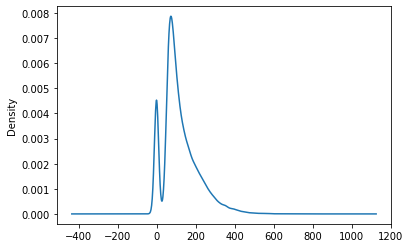

In [ ]:
training_set["CO2_working_capacity [mL/g]"].plot.kde()

# Cleaning data

## Get overall of the datasets

In [ ]:
training_set.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,6.652600e+04,68613.000000
mean,3447.363207,1656.761858,1666.766690,0.259164,0.376052,4.203271,11.919257,20.583592,28.599681,inf,120.002797
std,4840.665782,1259.086320,1366.317223,0.164758,0.476452,3.144905,10.783136,10.100870,153.806887,NaN,89.573112
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.612299e+00,-44.285746
25%,1556.075767,893.662700,511.930000,0.142580,0.119000,2.000000,4.000000,14.000000,12.818366,5.267536e+00,65.537205
50%,2190.442847,1259.699253,1542.830000,0.242620,0.248400,3.000000,10.000000,20.000000,19.689890,5.899089e+00,98.552185
75%,3605.836441,1897.163660,2517.960000,0.345120,0.443800,4.000000,16.000000,25.000000,32.954388,6.768365e+00,163.139540
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,29369.777780,inf,736.061636


## Remove outliers and missing-values

In [ ]:
training_set.replace([np.inf, -np.inf], np.nan, inplace=True)
training_set.dropna(inplace=True)
training_set.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000
mean,3492.507519,1650.170238,1714.389073,0.266775,0.386071,4.121294,11.503572,20.267390,27.433196,6.024007,123.762104
std,4854.967581,1262.418400,1351.150029,0.160315,0.475529,3.094715,10.188891,9.724248,23.763066,1.382389,88.162330
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.337830,1.612299,-44.285746
25%,1570.108078,891.326890,649.910000,0.152090,0.129200,2.000000,4.000000,14.000000,13.361640,5.270233,68.204430
50%,2223.697099,1248.686560,1591.550000,0.248520,0.257200,3.000000,10.000000,20.000000,20.173395,5.900900,101.265053
75%,3731.622666,1881.463278,2551.890000,0.348445,0.451000,4.000000,16.000000,25.000000,33.506651,6.770337,165.684112
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,914.244140,17.155375,736.061636


### Define trim function for removing outliers

In [ ]:
def trim(df, sort_col, lower=.15, upper=.85):
    x = df.sort_values([sort_col], ascending=True)[sort_col]
    x = x[x.between(x.quantile(lower), x.quantile(upper))]
    idx = x.index
    del x
    return df.loc[idx].sort_index()

In [ ]:
training_set = trim(training_set, "surface_area [m^2/g]", .2, .9)
training_set.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000,46341.000000
mean,2871.788139,1545.203513,1815.001886,0.272587,0.323759,4.152543,11.980233,20.737015,22.880924,5.837655,122.203733
std,2458.449431,1146.523911,809.067946,0.098185,0.184570,3.136812,10.794894,10.175588,14.214600,0.835001,79.733106
min,606.576038,439.281220,282.040000,0.057150,0.038900,1.000000,1.000000,1.000000,3.066968,2.798294,-8.314245
25%,1578.164592,865.517120,1179.040000,0.199190,0.186200,2.000000,4.000000,15.000000,13.926949,5.312211,70.712685
50%,2226.786967,1182.518580,1764.090000,0.267300,0.288800,3.000000,11.000000,20.000000,18.897279,5.767987,98.255707
75%,3321.464913,1801.287060,2432.560000,0.336790,0.424000,4.000000,16.000000,25.000000,27.402168,6.321149,153.469851
max,49079.066486,21852.035520,3519.900000,0.806590,2.478300,12.000000,58.000000,58.000000,220.443694,10.612112,736.061636


# Feature engineering

## topology-feature representation of a MOF

### Construct a topology encoder

In [ ]:
topology_feature = training_set[["topology"]].values
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(topology_feature)
print(enc.categories_)

[array(['acs', 'bcu', 'etb', 'fof', 'nbo', 'pcu', 'pts', 'rht', 'sra',
       'tbo', 'the'], dtype=object)]


### Save the encoder for future use

In [ ]:
model_path = os.path.join(".", "models", "topology_encoder.joblib")
dump(enc, model_path) 

['./models/topology_encoder.joblib']

### Use the encoder for featurizing MOFs topology-attributes

In [ ]:
X_topology_feature = enc.transform(training_set[["topology"]].values)
print(f"Topology-features matirx size: {X_topology_feature.shape}") 

Topology-features matirx size: (46341, 11)


## Density of MOFs

### Define function for computing density of a MOF

In [ ]:
def get_density(df):
    df["density [g/cm^3]"] = (df["weight [u]"] / df["volume [A^3]"]) * 1.66054
    return df.copy()

### Featurizing the density attribute for MOFs

In [ ]:
training_set= get_density(training_set)
training_set.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],density [g/cm^3]
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774,1.326090
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011,1.178856
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004,0.982408
5,mof_unit_6,3954.659761,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,sra,17.146541,5.398304,55.786959,0.647909
6,mof_unit_7,3565.914939,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,etb,18.363791,6.303857,111.690462,0.910268


# Construct the dataset representation matrix

## Pre-define features of dataset and set the target for prediction

In [ ]:
FEATURES = [
 'volume [A^3]',
 'weight [u]',
 'surface_area [m^2/g]',
 'void_fraction',
 'void_volume [cm^3/g]',
 'metal_linker',
 'organic_linker1',
 'organic_linker2',
 'CO2/N2_selectivity',
 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
 'density [g/cm^3]'
]
TARGET = 'CO2_working_capacity [mL/g]'

In [ ]:
X = training_set[FEATURES].values
y = training_set[TARGET].values

print(f"Features matirx size     : {X.shape}")
print(f"Target values vector size: {y.shape}")

Features matirx size     : (46341, 11)
Target values vector size: (46341,)


## Append topogoly-features to the dataset representation matrix

In [ ]:
X = np.concatenate(
    (X, X_topology_feature.toarray()), axis=1
)
print(f"Features matirx size: {X.shape}")

Features matirx size: (46341, 22)


## Standard scaling

### Construct standard scaler

In [ ]:
scaler = StandardScaler().fit(X)

### Save the scaler for future use

In [ ]:
model_path = os.path.join(".", "models", "standardizer.joblib")
dump(scaler, model_path) 

['./models/standardizer.joblib']

### Scaling the representation matrix

In [ ]:
X = scaler.transform(X)

# Processing data for the pretest set

## Define pipeline process

In [ ]:
def get_processed(df, enc, scaler):
    df = get_density(df)
    T = test_set[FEATURES].values
    T_topology_feature = enc.transform(test_set[["topology"]].values)
    T = np.concatenate(
        (T, T_topology_feature.toarray()), axis=1
    )
    T = scaler.transform(T)
    return T

### Get pre-testset

In [ ]:
test_set = pd.read_csv(testing_path)
T = get_processed(test_set, enc, scaler)
T

array([[-0.67664795, -0.65197264, -1.51838316, ..., -0.37097333,
        -0.01971233, -0.02369332],
       [ 0.51033794,  1.90879394, -1.18966803, ..., -0.37097333,
        -0.01971233, -0.02369332],
       [-0.51644482, -0.69601832,  1.6571446 , ..., -0.37097333,
        -0.01971233, -0.02369332],
       ...,
       [ 0.73136982, -0.1946379 ,  3.05757362, ..., -0.37097333,
        -0.01971233, -0.02369332],
       [ 0.7363797 , -0.28930545,  3.11084537, ..., -0.37097333,
        -0.01971233, -0.02369332],
       [ 9.28678321,  2.83295326,  3.94456679, ..., -0.37097333,
        -0.01971233, -0.02369332]])

# Save the processed dataset to .csv files

## Define header for the csv

In [ ]:
index_features_map = dict()
for _i, _feature in enumerate(FEATURES):
    index_features_map[str(_i)]=_feature

try:
    for _i, _feature in enumerate(enc.categories_[0].tolist()):
        index_features_map[str(len(FEATURES)+_i)]=_feature
except NameError:
    print('X_topology_feature does not exist.')
except AttributeError:
    print('X_topology_feature does not have a shape property.')
    
index_features_map

assert [index_features_map[str(idx)] for idx in range(len(index_features_map))] == list(index_features_map.values())

In [ ]:
list(index_features_map.values())

['volume [A^3]',
 'weight [u]',
 'surface_area [m^2/g]',
 'void_fraction',
 'void_volume [cm^3/g]',
 'metal_linker',
 'organic_linker1',
 'organic_linker2',
 'CO2/N2_selectivity',
 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
 'density [g/cm^3]',
 'acs',
 'bcu',
 'etb',
 'fof',
 'nbo',
 'pcu',
 'pts',
 'rht',
 'sra',
 'tbo',
 'the']

## Converting to pandas dataframe

In [ ]:
processed_train_set = pd.DataFrame(np.concatenate((X, y.reshape(-1,1)), axis=1), columns=list(index_features_map.values())+[TARGET])
processed_train_set

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,etb,fof,nbo,pcu,pts,rht,sra,tbo,the,CO2_working_capacity [mL/g]
0,-0.041606,0.581323,-1.497285,-1.371381,-1.190670,1.864160,2.966228,3.563762,0.755278,1.568435,...,4.550317,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,101.224774
1,-0.724843,-0.672924,-1.268760,-1.261383,-1.070389,-0.686227,0.928205,0.320671,-0.254473,0.611158,...,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,118.987011
2,-0.271145,-0.209823,-0.461613,-0.554545,-0.551339,1.545362,0.465018,0.320671,0.198422,0.422076,...,-0.219765,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,2.695612,-0.019712,-0.023693,187.626004
3,0.440474,-0.001898,0.760820,1.001721,1.347692,1.545362,-0.461356,0.222396,-0.403419,-0.526174,...,-0.219765,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,2.695612,-0.019712,-0.023693,55.786959
4,0.282346,0.357211,-0.352239,0.619071,0.229946,1.864160,3.799964,3.367211,-0.317785,0.558331,...,4.550317,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,111.690462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46336,-0.686003,-0.518327,-0.646012,-0.203367,-0.726884,-0.686227,0.001831,-0.170706,-1.057365,-1.745722,...,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,7.483415
46337,0.002501,0.132100,0.298245,2.088561,0.889324,-0.367429,-0.368718,-0.662083,-1.090529,-1.830565,...,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,5.968178
46338,0.633005,0.362411,0.721057,3.160735,2.541291,-0.367429,-0.461356,-0.367257,-1.239194,-2.490474,...,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,6.346203
46339,7.802476,4.140956,2.051541,4.407480,6.311179,-1.005026,-0.461356,-0.170706,-1.286549,-3.235074,...,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693,-4.405398


In [ ]:
processed_test_set = pd.DataFrame(T, columns=list(index_features_map.values()))
processed_test_set

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,-0.676648,-0.651973,-1.518383,-1.616025,-1.191212,-0.686227,-0.646631,0.517222,0.967949,1.398798,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
1,0.510338,1.908794,-1.189668,-0.600072,-0.983700,-0.048630,-0.553993,-0.367257,-0.315892,-0.860195,...,-0.22669,-0.219765,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
2,-0.516445,-0.696018,1.657145,0.674681,0.616254,-0.367429,-0.090806,-0.367257,-0.690711,-0.948818,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
3,-0.177007,-0.479194,2.108731,1.344955,1.476642,-0.686227,-1.017180,0.713773,-0.934242,-0.875957,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
4,0.102354,-0.181128,1.067237,1.191671,1.214408,-0.367429,-0.368718,-0.170706,-0.696895,-0.658708,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,12.117181,2.772305,4.826764,5.128679,15.755946,-0.367429,-0.831905,-0.662083,-1.290539,-3.222734,...,-0.22669,-0.219765,-0.123032,6.785772,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16996,0.894561,-0.040184,2.722023,3.252400,4.778951,-0.367429,-1.017180,-0.956910,-1.135142,-2.609347,...,-0.22669,-0.219765,-0.123032,6.785772,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16997,0.731370,-0.194638,3.057574,2.820353,4.579025,-0.686227,-0.461356,0.222396,-1.281423,-2.688173,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16998,0.736380,-0.289305,3.110845,3.400184,5.880443,-0.367429,-0.461356,0.418947,-1.270371,-2.854109,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693


## Save to .csv

In [ ]:
processed_train_path = os.path.join(".", "processed", "train.csv")
processed_train_set.to_csv(processed_train_path, index=False)

In [ ]:
processed_test_path = os.path.join(".", "processed", "test.csv")
processed_test_set.to_csv(processed_test_path, index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d59402b5-3ee5-4c9e-aee0-4349ccd0c385' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>